In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [11]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
q = 0
p = 1
par = x,y,p,q
k = 0.01
gamma = 0.1
mu = 0.2
beta = 0.2
alpha = 3.88
count = 6
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

# Van der Pol

<p>Calculating Period, Frequency, angular frequency and Amplitude for a changing alpha value (0-5)
because the Van der Pol Oscillator doesnt change its Oscillation behavior, the Period, Frequency,.. ect can be be calculate with more accuracy (more timesteps)</p>

if mu = 0.01, the period is 2π

for the Simulation, we gonna use mu = 2, to have this rectangular limit cycle

In [12]:
# vdp specific values
t_step_vdp = 0.01
t_last_vdp = 1000 # 1 point represent 1mHz
t_vdp = np.arange(0, 5000, t_step_vdp)
keep_vdp = int(t_last_vdp / t_step_vdp)
x_vdp = 0.5
y_vdp = 0.5
q_vdp = 0.5
p_vdp = 0.5
par_vdp = x,y,p,q
count_vdp = 10
vdp = OnesidedCoupling(par_vdp, t_vdp, t_vdp, k, mu, gamma, alpha, beta)

In [13]:
period_vdp = lilie.period(count_vdp)[1]
f_vdp = 1/period_vdp
w_vdp = 2 * np.pi * f_vdp
amp_vdp = np.mean(lilie.find_peaks_max()[1][1]['peak_heights'])
time_amp_vdp = [t[i] for i in lilie.find_peaks_max()[1][0][-10:]]

print(period_vdp)
print(f_vdp)
print(w_vdp)
print(amp_vdp)
print(time_amp_vdp)


6.298999999999978
0.15875535799333282
0.997489332779744
0.006960085171847154
[np.float64(39.43), np.float64(45.730000000000004), np.float64(52.03), np.float64(58.33), np.float64(64.63), np.float64(70.93), np.float64(77.22), np.float64(83.52), np.float64(89.82000000000001), np.float64(96.12)]


## Solutions

In [46]:
xsol = lilie.x_solv()[-keep:]
ysol = lilie.y_solv()[-keep:]
psol = lilie.p_solv()[-keep:]
qsol = lilie.q_solv()[-keep:]


## Find Peaks

In [47]:
xmax = lilie.maximumofplot()[0]
ymax = lilie.maximumofplot()[1]
x_amplitude = lilie.find_peaks_max()[0]
y_amplitude = lilie.find_peaks_max()[1]

# Timeseries
showing the timeseries for Van der Pol Oscillator and Duffing oscillator with the Maximum peak of the Plot.

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 3.88, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


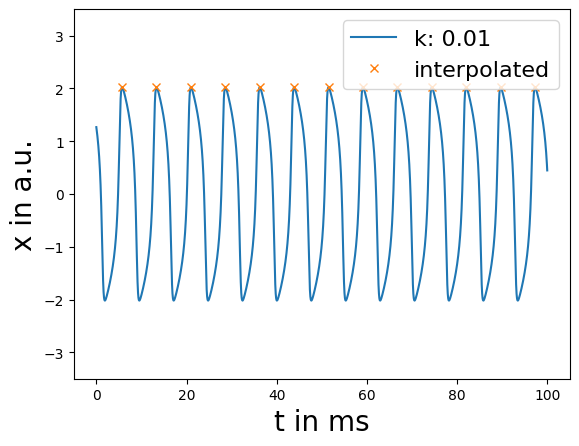

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 3.88, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


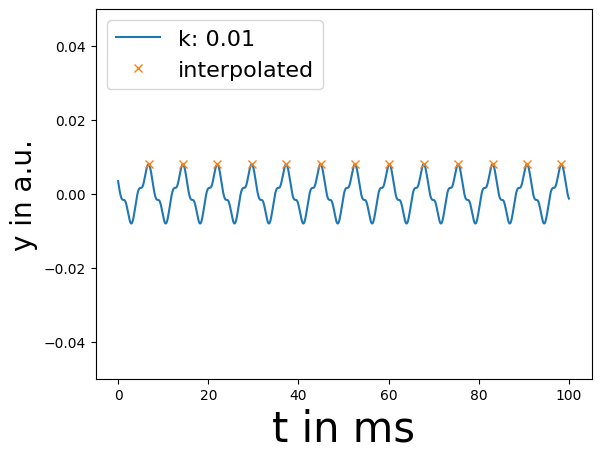

In [83]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "interpolated")
# plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "max peak")

plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.ylabel("y in a.u.", fontsize = 20)

y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 30)
plt.ylim([-0.05, 0.05])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

## Quadratic Interpolation

In [26]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:253: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


In [27]:
xing, x_amplitude[1]['peak_heights']

([np.float64(-1.4675813134377576),
  np.float64(-1.4674950506497382),
  np.float64(-1.467387634852912),
  np.float64(-1.4672727868233437),
  np.float64(-1.4671624706217017),
  np.float64(-1.4670523541960847),
  np.float64(-1.4669423301882034),
  np.float64(-1.4668323434298145),
  np.float64(-1.4667223789886066),
  np.float64(-1.4666124131799734),
  np.float64(-1.466502519118876),
  np.float64(-5.6590930188151845),
  np.float64(-2.415397286232974)],
 array([2.01987754, 2.01987847, 2.01987937, 2.01988024, 2.01988107,
        2.01988187, 2.01988263, 2.01988337, 2.01988407, 2.01988474,
        2.01988538, 2.01988598, 2.01988655]))

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.20, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


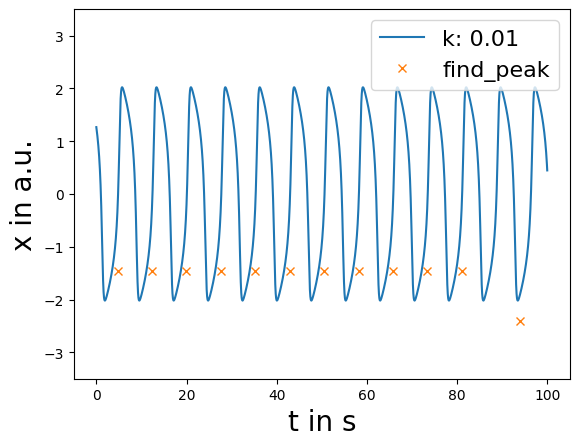

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.20, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


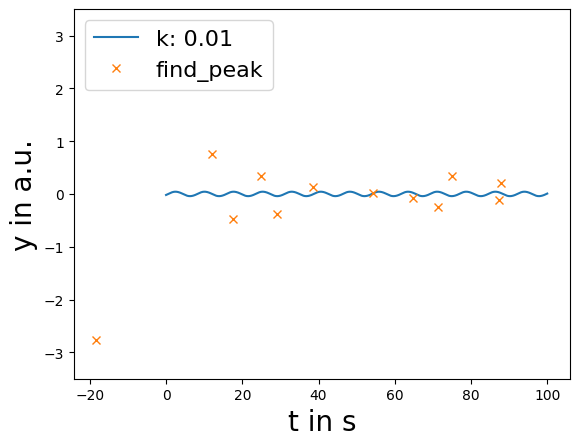

In [28]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot(tx_plus, xing, "x", label = "find_peak")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in s", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot(ty_plus, ying, "x", label = "find_peak")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in s", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Phasetime

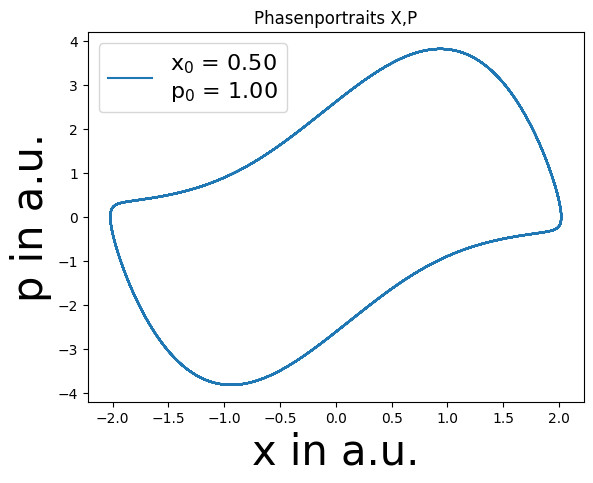

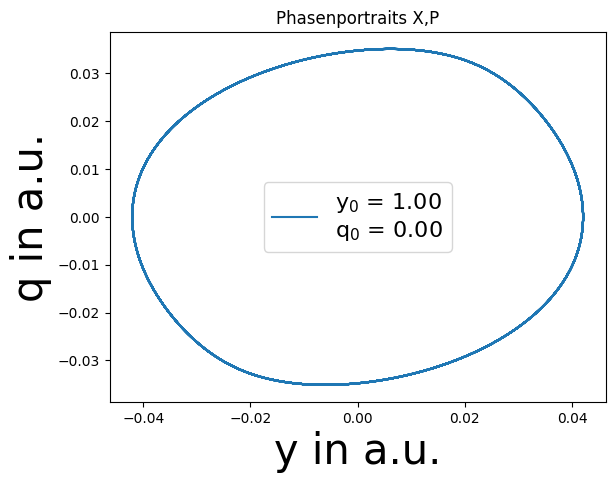

In [29]:

label = f"x$_0$ = {par[0]:.2f} \np$_0$ = {par[2]:.2f}"
plt.plot(xsol[-keep:],psol[-keep:],label = label)
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

label = f"y$_0$ = {par[1]:.2f} \nq$_0$ = {par[3]:.2f}"
plt.plot(ysol[-keep:],qsol[-keep:],label = label)
plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

# Resonance Curve

In [30]:
r_alpha = 0.64
print(np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).period(10)))
print(1/np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).period(10)))
print(2 * np.pi * 1/np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).period(10)))
print(np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).find_peaks_max()[1][1]['peak_heights']))

7.629500000000007
0.13107018808571977
0.8235382799894594
0.23395276092828274


In [5]:
reso_alpha = np.arange(0.2, 4, 0.01)
omega = [np.sqrt(i) for i in reso_alpha]
revers_omega = [i for i in reversed(omega)]

In [73]:
amp[-6]
amp.index(amp[-6])
reso_alpha[15]


np.float64(3.9000000000000004)

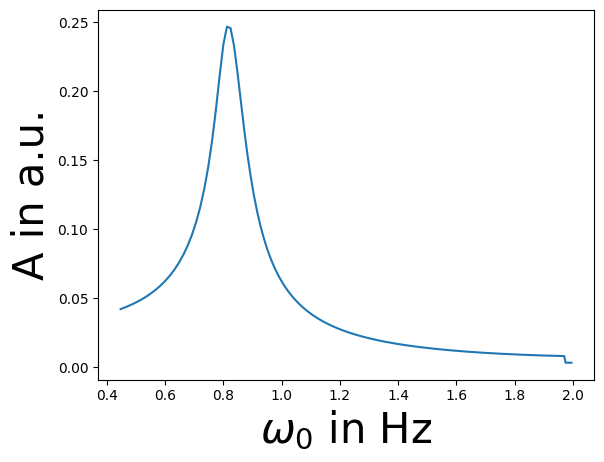

In [87]:
# findpeaks
amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-10:]) for i in reso_alpha]



# reverse_amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reversed(reso_alpha)]
plt.plot(omega, amp)
# plt.plot(revers_omega, reverse_amp)
plt.xlabel("$\omega _0$ in Hz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

In [58]:
amp.index(amp[-7])
reso_alpha[183]

np.float64(3.859999999999998)

# changing Mu Resonance curve

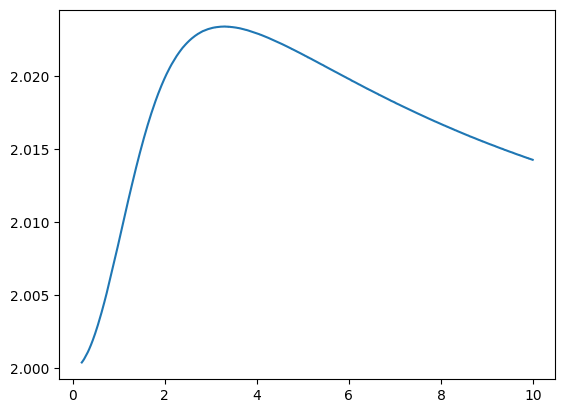

In [ ]:
reso_mu = np.arange(0.2, 4, 0.1)
mu_amp = [np.mean(OnesidedCoupling(par, t, keep, k, i, gamma, 0.2, beta).find_peaks_max()[0][1]['peak_heights'][-10:]) for i in reso_mu]

plt.plot(reso_mu, mu_amp)
plt.show()

# Phase difference

In [34]:
print(time_amp_vdp)
print(time_amp)

[np.float64(2.44), np.float64(10.07), np.float64(17.7), np.float64(25.330000000000002), np.float64(32.96), np.float64(40.59), np.float64(48.22), np.float64(55.85), np.float64(63.480000000000004), np.float64(71.11)]
[array([ 1.75,  8.03, 14.32, 20.61, 26.9 , 33.18, 39.47, 45.76, 52.04,
       58.33]), array([ 1.74,  8.03, 14.32, 20.61, 26.89, 33.18, 39.47, 45.75, 52.04,
       58.33]), array([ 1.74,  8.03, 14.32, 20.6 , 26.89, 33.18, 39.46, 45.75, 52.04,
       58.33]), array([ 1.74,  8.02, 14.31, 20.6 , 26.89, 33.17, 39.46, 45.75, 52.03,
       58.32]), array([ 1.73,  8.02, 14.31, 20.6 , 26.88, 33.17, 39.46, 45.74, 52.03,
       58.32]), array([ 1.73,  8.02, 14.3 , 20.59, 26.88, 33.17, 39.45, 45.74, 52.03,
       58.31]), array([ 1.73,  8.01, 14.3 , 20.59, 26.87, 33.16, 39.45, 45.74, 52.02,
       58.31]), array([ 1.72,  8.01, 14.3 , 20.58, 26.87, 33.16, 39.44, 45.73, 52.02,
       58.31]), array([ 1.72,  8.  , 14.29, 20.58, 26.87, 33.15, 39.44, 45.73, 52.01,
       58.3 ]), array([ 1.

/var/folders/2q/qj12d6zd1qg4x5blqbp5z8fc0000gn/T/ipykernel_8664/3086043535.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 16, loc = "upper right")


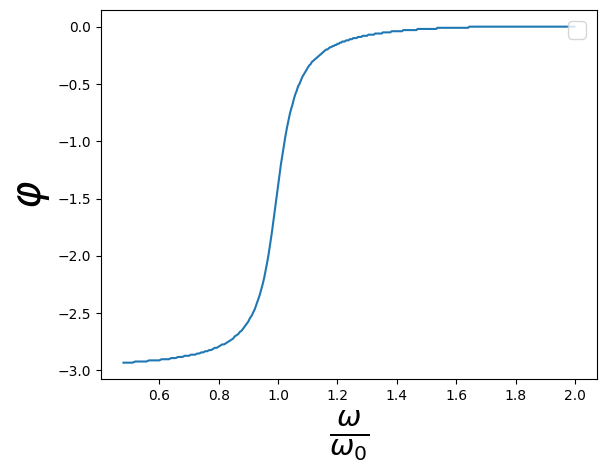

In [15]:
time_amp = [t[k] for k in [OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][0][-10:] for i in reso_alpha]]
phaseamp = [2 * np.pi * (time_amp_vdp[0]-i[0])/period_vdp for i in time_amp]

plt.plot(omega[3:], phaseamp[3:])
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\\frac{\omega}{\omega _0}$", fontsize = 30)
plt.ylabel("$\\varphi$",fontsize = 30)
plt.show()

# Lorenzcurve

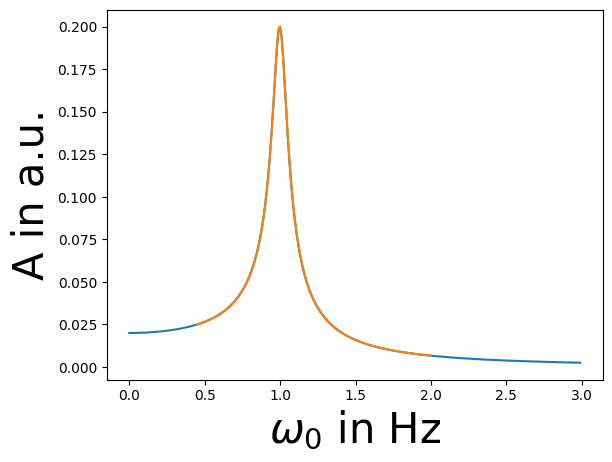

In [115]:
def lorenz(x, omega, gamma):
    return 0.02 / np.sqrt((x**2 - omega ** 2)**2 + gamma ** 2 * x ** 2)

lorenzomega = np.arange(0, 3, 0.01)

lorenz_sol = [lorenz(i, 1, 0.1) for i in lorenzomega]

plt.plot(lorenzomega, lorenz_sol)
amp = [np.mean(OnesidedCoupling(par, t, keep, k, 0.1, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-10:]) for i in reso_alpha]



# reverse_amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reversed(reso_alpha)]
plt.plot(omega, amp)
# plt.plot(revers_omega, reverse_amp)
plt.xlabel("$\omega _0$ in Hz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

# Randomstuff

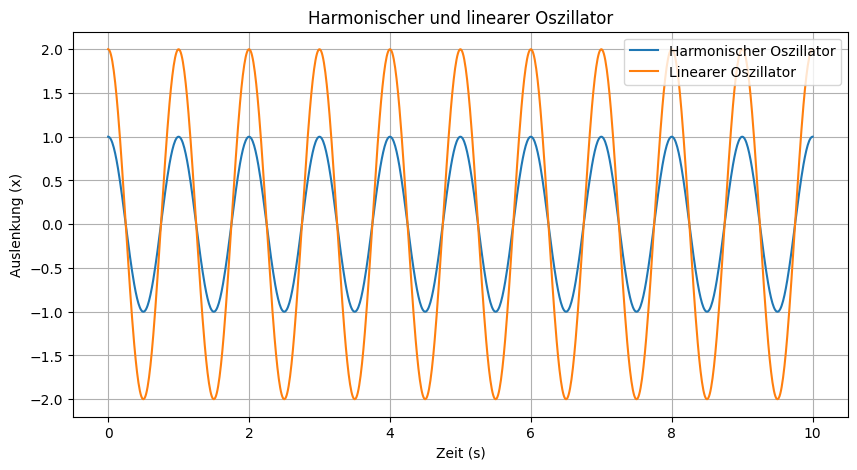

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
